In [138]:
#Business Understanding: Analyzing one of the lending financial insititution  involved in lending various types of loans to urban customers.
# upon recieving aloan application, the company has to decide to approve or reject the loan basis on the customer's profile. 
# Two types of risks are associated with the bank’s decision:
   # (1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
   # (2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


# Objective of case study: The aim is to identify patterns which indicate if a person is likely to default, which may be used for
#                          taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at 
                           #a higher interest rate, etc.



In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

data = pd.read_csv("loan.csv")
warnings.filterwarnings('ignore') # to ignore the warnings

#data.head(10)
#data.shape
data.info()
#data.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [140]:
# check if any null values - we should also check if there are any unncessary headers and footers but in this case we have alreavy verified that in the csv file
# so we are not doing any duplicate efforts here
count_null = data.isnull().sum()
count_null



id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [141]:
# check if any duplicatre rows
dup = len(data[data.duplicated()])
dup

0

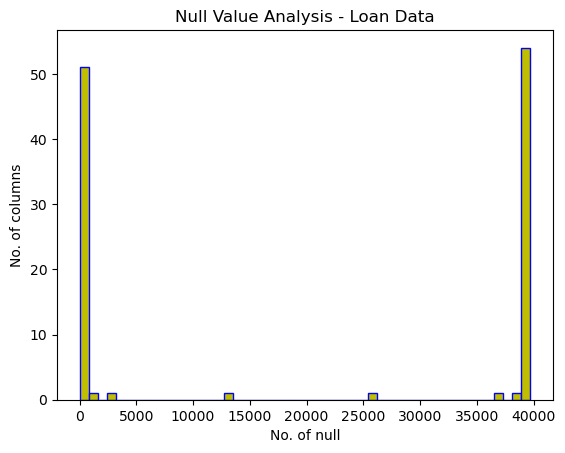

In [142]:
plt.hist(count_null,color="y", bins=50,edgecolor="b")
plt.title("Null Value Analysis - Loan Data")
plt.xlabel("No. of null")
plt.ylabel("No. of columns")
plt.show()

In [143]:
# let's check which columns are these having so many  null values

count_null.loc[count_null.values>10000].sort_values()


desc                              12942
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mo_sin_rcnt_tl                    39717
mort_acc                          39717
mths_since_recent_bc              39717
mths_since_recent_bc_dlq          39717
mths_since_recent_inq             39717
mths_since_recent_revol_delinq    39717
num_accts_ever_120_pd             39717
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_bc_tl                         39717
num_il_tl                         39717
num_rev_accts                     39717
mo_sin_rcnt_rev_tl_op             39717
num_rev_tl_bal_gt_0               39717
num_sats                          39717
num_tl_120dpd_2m                  39717
num_tl_30dpd                      39717
num_tl_90g_dpd_24m                39717
num_tl_op_past_12m                39717
pct_tl_nvr_dlq                    39717


In [144]:
# so many null values, I think we are good to deleted because we can't have anlysis on null values

data.drop(columns = list(count_null[count_null.values>10000].index), inplace = True)
#count_null.shape
#count_null
data.shape


(39717, 53)

In [145]:
uniq_col = data.nunique()
print(uniq_col) 


id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [146]:
uniq_data = uniq_col[uniq_col.values == 1]
uniq_data.index
#data.drop(columns = list(uniq_col.index), inplace=True)
#data.shape




Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [147]:
data.drop(columns = list(uniq_data.index), inplace=True)
data.shape

(39717, 44)

In [148]:
# Fields after loan application approved and  fields like id, member_id & url are different for each application, #zip code doesn't have full data
remove_fields = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
data.drop(columns=remove_fields, inplace=True)
#data.shape
data.info



<bound method DataFrame.info of        loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
4           3000         3000           3000.0   60 months   12.69%   
...          ...          ...              ...         ...      ...   
39712       2500         2500           1075.0   36 months    8.07%   
39713       8500         8500            875.0   36 months   10.28%   
39714       5000         5000           1325.0   36 months    8.07%   
39715       5000         5000            650.0   36 months    7.43%   
39716       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade                   emp_title emp_length  \
0           162.87     B        B2    

In [149]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


In [150]:
# let's do some data conversion

In [151]:
data['term'].value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [152]:
# lets remove the string part
def remove_str(term):
  return int(term.strip().split()[0])
    
data['term'] = data['term'].apply(remove_str)
data['term']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

In [153]:
data['loan_status'].value_counts()
#analysis on only load either fully paid or charged off

#data = data.drop(data['loan_status']== "Current", inplace=True)
data = data[~(data['loan_status'] == 'Current')]
data.shape
data.describe

<bound method NDFrame.describe of        loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  installment  \
0           5000         5000           4975.0    36   10.65%       162.87   
1           2500         2500           2500.0    60   15.27%        59.83   
2           2400         2400           2400.0    36   15.96%        84.33   
3          10000        10000          10000.0    36   13.49%       339.31   
5           5000         5000           5000.0    36    7.90%       156.46   
...          ...          ...              ...   ...      ...          ...   
39712       2500         2500           1075.0    36    8.07%        78.42   
39713       8500         8500            875.0    36   10.28%       275.38   
39714       5000         5000           1325.0    36    8.07%       156.84   
39715       5000         5000            650.0    36    7.43%       155.38   
39716       7500         7500            800.0    36   13.75%       255.43   

      grade sub_grade        

<Axes: >

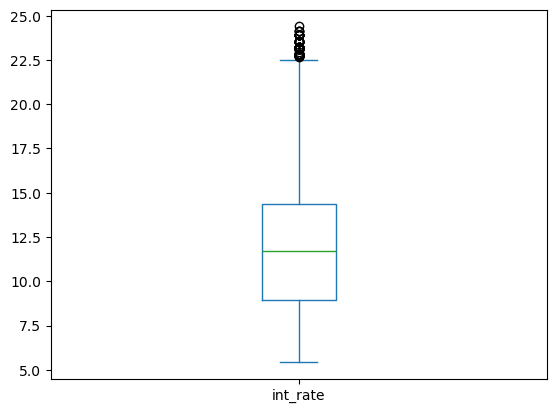

In [154]:
#data['int_rate'].head()
data['int_rate'] = data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
data['int_rate'].describe()
data['int_rate'].plot.box()

In [155]:
# convert few more columns to float
data = data.astype({'loan_amnt':'float', 'funded_amnt':'float'})
data


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,36,8.07,78.42,A,A4,FiSite Research,4 years,...,11.33,0,Nov-90,0,13,0,7274,13.10%,40,NaN
39713,8500.0,8500.0,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,6.40,1,Dec-86,1,6,0,8847,26.90%,9,NaN
39714,5000.0,5000.0,1325.0,36,8.07,156.84,A,A4,NaN,< 1 year,...,2.30,0,Oct-98,0,11,0,9698,19.40%,20,NaN
39715,5000.0,5000.0,650.0,36,7.43,155.38,A,A2,NaN,< 1 year,...,3.72,0,Nov-88,0,17,0,85607,0.70%,26,NaN


In [156]:
data['grade'].value_counts()


grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

<Axes: >

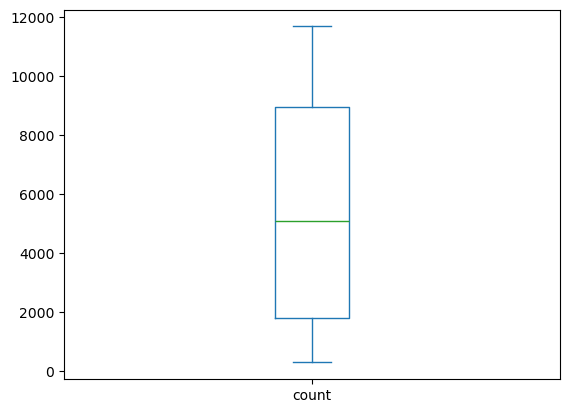

In [157]:
data['grade'].value_counts().plot.box()


In [158]:
data['sub_grade'].value_counts()


sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [159]:
data['emp_length'].unique()
data.columns



Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [160]:
data['home_ownership'].value_counts()


home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [161]:
data['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [162]:
data['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

<Axes: xlabel='verification_status'>

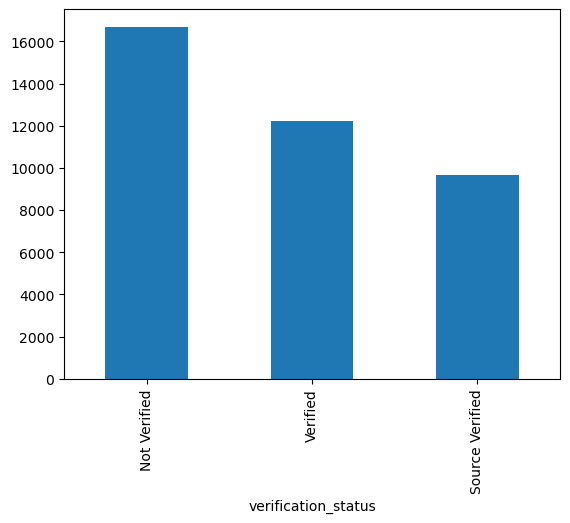

In [163]:
data['verification_status'].value_counts().plot.bar()


In [164]:
#m, y = data['issue_d'].str.split('-').str

#data['issue_d'] = df['issue_d'].dt.day
#data['issue_d'].str.slice(8, 10)

In [165]:
data['purpose'].value_counts()



purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [166]:
#data['issue_d'].date()
#data['issue_d']= pd.to_datetime(data.issue_d,format='%y')
#data['issue_d']
#pd.to_datetime(data.issue_d, format='%Y%m%d', errors='coerce')

#data['issue_d']= pd.to_datetime(data['issue_d'])
#c#hange_format = data['issue_d'].dt.strftime('%d-%m-%Y')
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
data['issue_d']



0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [167]:
data['title'].head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
Name: title, dtype: object

In [168]:
data['earliest_cr_line'].value_counts()
y = data['earliest_cr_line'].str.split('-').str[1]
y.value_counts()

earliest_cr_line
00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: count, dtype: int64

In [169]:
from datetime import datetime
today = datetime.today()
today.year

2024

In [170]:
def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days

In [171]:
data['days_from_earliest_cr_line'] = data['earliest_cr_line'].apply(days_from_earliest_cr_line)
data['days_from_earliest_cr_line'].describe()

count    38577.000000
mean     10091.981647
std       2491.854695
min       5804.000000
25%       8422.000000
50%       9641.000000
75%      11253.000000
max      28754.000000
Name: days_from_earliest_cr_line, dtype: float64

In [172]:
data.drop(columns=['earliest_cr_line'], inplace=True)

In [173]:
data['revol_util'] = pd.Series(data['revol_util']).str.replace('%', '').astype(float)

In [174]:
#data['emp_length']

data['emp_length'].value_counts()  
data['emp_length'] = data['emp_length'].astype(str).str.lstrip('<').str.rstrip('years') 
data['emp_length'] = data['emp_length'].astype(str).str.strip('+')
data['emp_length'] = data['emp_length'].astype(str).str.replace("+", "")
data['emp_length']


0        10 
1         1 
2        10 
3        10 
5         3 
        ... 
39712     4 
39713     3 
39714     1 
39715     1 
39716     1 
Name: emp_length, Length: 38577, dtype: object

In [175]:
#derive month and year

data['issue_year']=pd.DatetimeIndex(data['issue_d']).year
data['issue_month']=pd.DatetimeIndex(data['issue_d']).month


In [176]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   38577 non-null  float64       
 1   funded_amnt                 38577 non-null  float64       
 2   funded_amnt_inv             38577 non-null  float64       
 3   term                        38577 non-null  int64         
 4   int_rate                    38577 non-null  float64       
 5   installment                 38577 non-null  float64       
 6   grade                       38577 non-null  object        
 7   sub_grade                   38577 non-null  object        
 8   emp_title                   36191 non-null  object        
 9   emp_length                  38577 non-null  object        
 10  home_ownership              38577 non-null  object        
 11  annual_inc                  38577 non-null  float64       


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,days_from_earliest_cr_line,issue_year,issue_month
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38527.000000,38577.000000,37880.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,6.877797e+04,2010-10-25 23:47:14.030640128,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,48.702777,22.052648,0.043479,10091.981647,2010.309070,7.114757
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,2007-06-01 00:00:00,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5804.000000,2007.000000,1.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,4.000000e+04,2010-05-01 00:00:00,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,25.200000,13.000000,0.000000,8422.000000,2010.000000,4.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,5.886800e+04,2011-01-01 00:00:00,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,49.100000,20.000000,0.000000,9641.000000,2011.000000,7.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,8.200000e+04,2011-08-01 00:00:00,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,72.300000,29.000000,0.000000,11253.000000,2011.000000,10.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000,28754.000000,2011.000000,12.000000
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,6.421868e+04,NaN,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,28.364741,11.425861,0.204583,2491.854695,0.882658,3.408523


<Axes: xlabel='loan_status'>

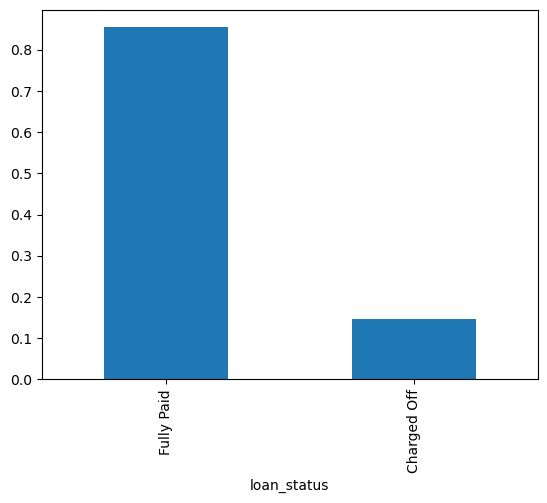

In [177]:
loan_percentage =  data['loan_status'].value_counts(normalize=True)
loan_percentage.plot.bar()

In [178]:
#data.head()
# here are some of the global settings/constants that will be referred to within the functions defined below
#colors = ["#fca9a9","#a9fea9"]
colors = ["#a9fea9","#aca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
# loan_status_pct from above will be used in the below functions as well

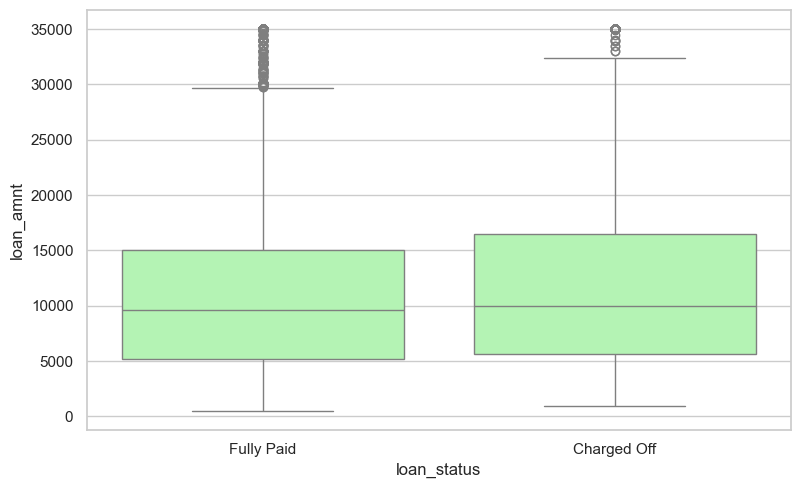

In [179]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
colors = ["#a9fea9","#fca9a9"]

sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = data)
plt.show()

In [180]:
data['loan_amnt'].describe()


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [181]:
## Univariate Analysis begin


In [182]:
# for different chart purposes let's create the range for a better view & analysis

def range_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

data['loan_amnt_b'] = data.apply(lambda x : range_loan_amnt(x['loan_amnt']), axis = 1)

In [183]:
def range_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

data['annual_inc_b'] = data.apply(lambda x: range_annual_inc(x['annual_inc']), axis = 1)

In [184]:
def range_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Medium'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

data['int_rate_b'] = data.apply(lambda x : range_int_rate(x.int_rate), axis = 1)

In [185]:
#DTI Bins
def range_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Medium'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

data['dti_b'] = data.apply(lambda x : range_dti(x.dti), axis = 1)

In [186]:
# here are some of the global settings/constants that will be referred to within the functions defined below
#colors = ["#fca9a9","#a9fea9"]
colors = ["#a9fea9","#aca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
# loan_status_pct from above will be used in the below functions as well

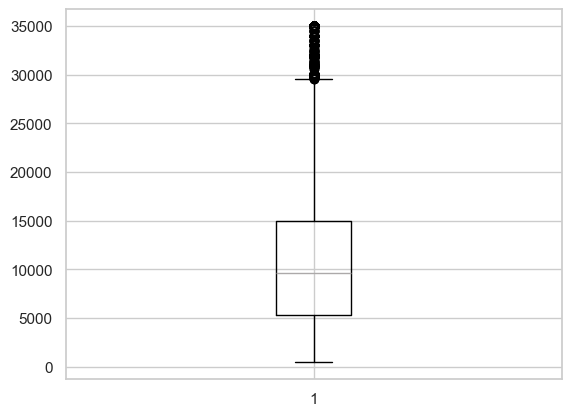

In [187]:
plt.boxplot(data['loan_amnt'],)
plt.show()

In [188]:
# Univarients function
def plot_digram(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    #p[0].set_xlabel(column_titles[column])
    #p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

In [189]:
data['loan_amnt'].describe()



count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

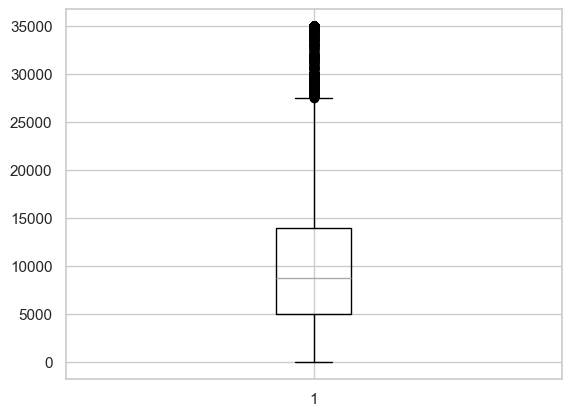

In [190]:
plt.boxplot(data['funded_amnt_inv'])
plt.show()



In [191]:
data['annual_inc'].describe()


count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

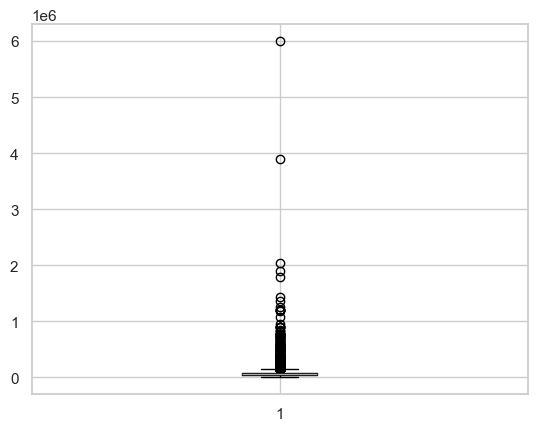

In [192]:
plt.boxplot(data['annual_inc'])
plt.show()


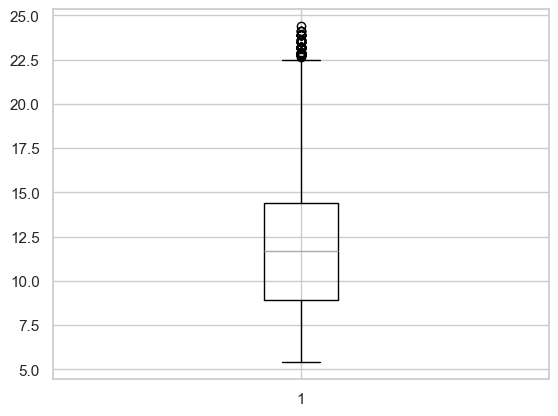

In [193]:
plt.boxplot(data['int_rate'])
plt.show()


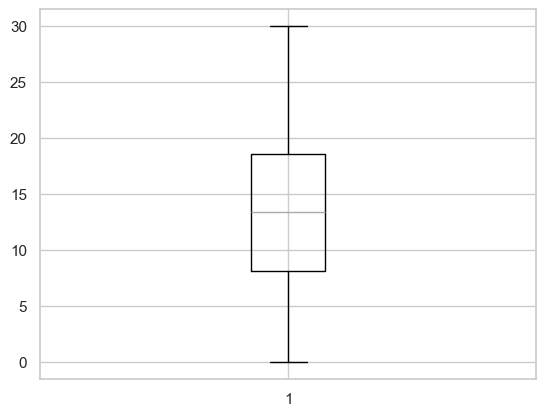

In [194]:
plt.boxplot(data['dti'])
plt.show()


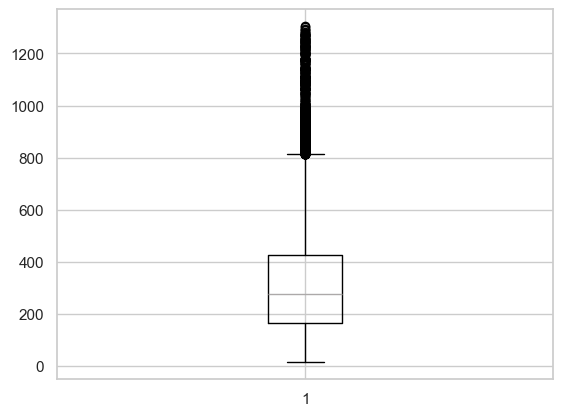

In [195]:
plt.boxplot(data['installment'])
plt.show()


In [196]:
 # Lets remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
data =remove_outliers_iqr(data, outliers_columns_set1,1.5)
data =remove_outliers_iqr(data, outliers_columns_set2,1.5)


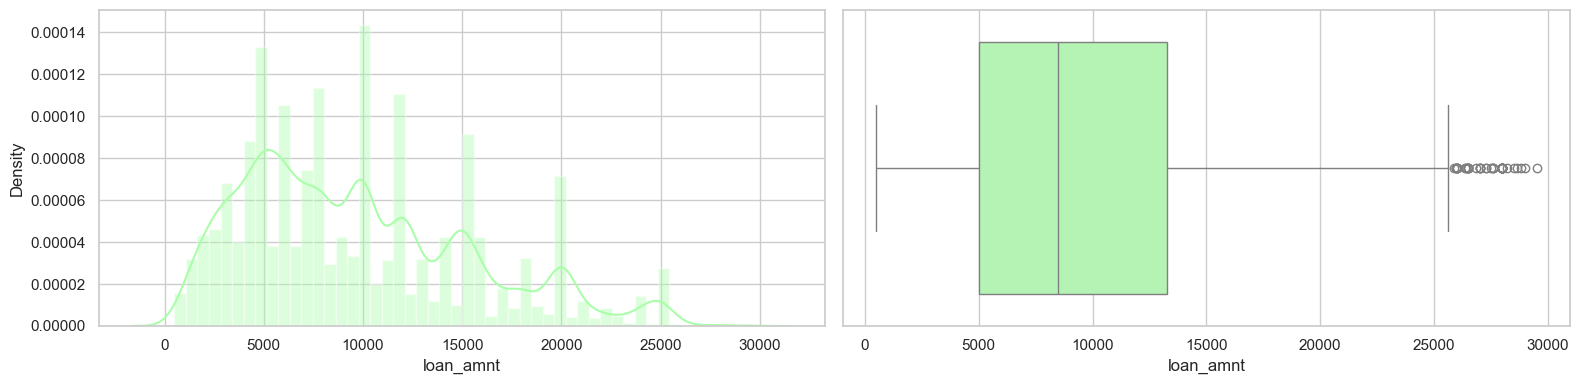

count    34565.000000
mean      9698.465210
std       5758.780454
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13250.000000
max      29500.000000
Name: loan_amnt, dtype: float64

In [197]:
plot_digram(data ,'loan_amnt')
data['loan_amnt'].describe()



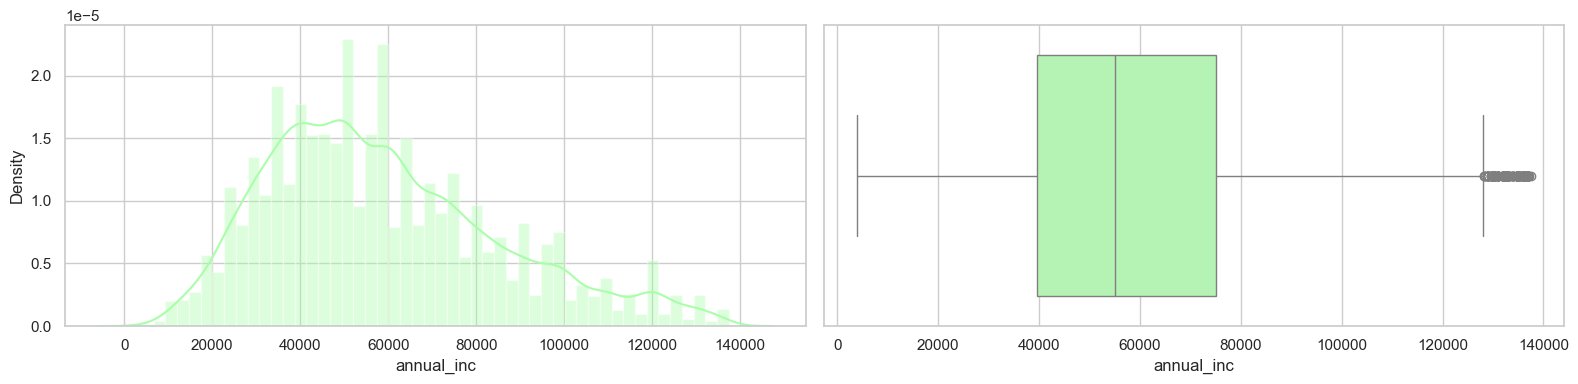

count     34565.000000
mean      58869.115884
std       26476.002826
min        4000.000000
25%       39600.000000
50%       54996.000000
75%       75000.000000
max      137481.000000
Name: annual_inc, dtype: float64

In [198]:
plot_digram(data ,'annual_inc')
data['annual_inc'].describe()


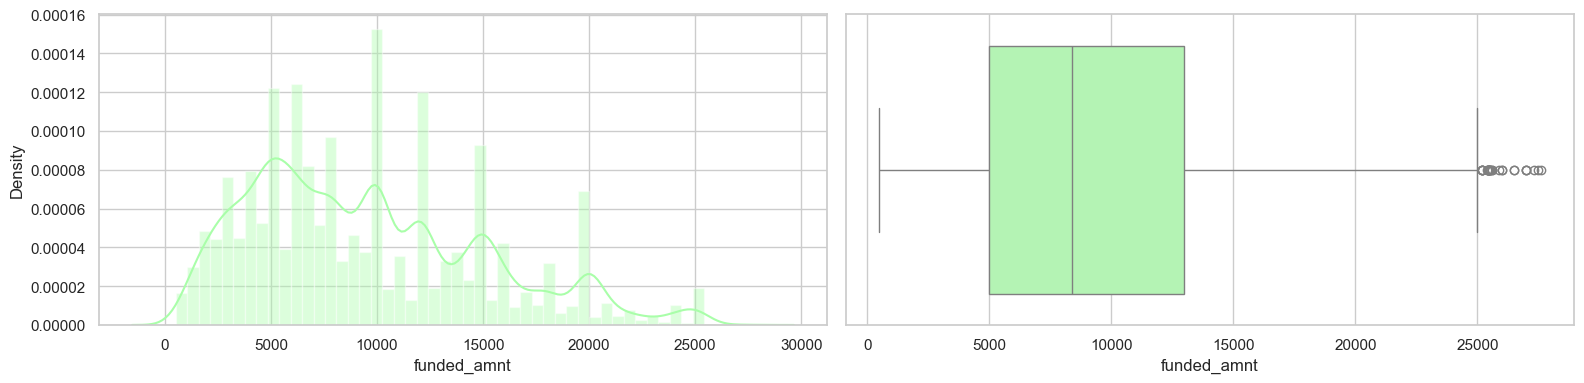

count    34565.000000
mean      9477.223347
std       5515.248347
min        500.000000
25%       5000.000000
50%       8400.000000
75%      13000.000000
max      27600.000000
Name: funded_amnt, dtype: float64

In [199]:
plot_digram(data ,'funded_amnt')
data['funded_amnt'].describe()


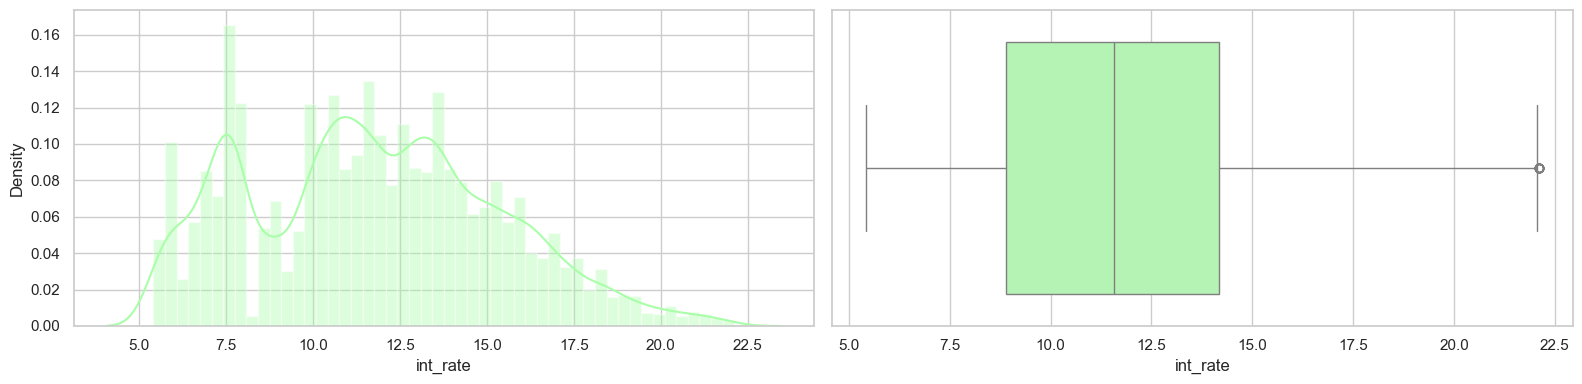

count    34565.000000
mean        11.722774
std          3.576761
min          5.420000
25%          8.900000
50%         11.580000
75%         14.170000
max         22.110000
Name: int_rate, dtype: float64

In [200]:
plot_digram(data, 'int_rate')
data['int_rate'].describe()


In [201]:
#Unordered Categorical Variable Analysis

<Axes: xlabel='home_ownership'>

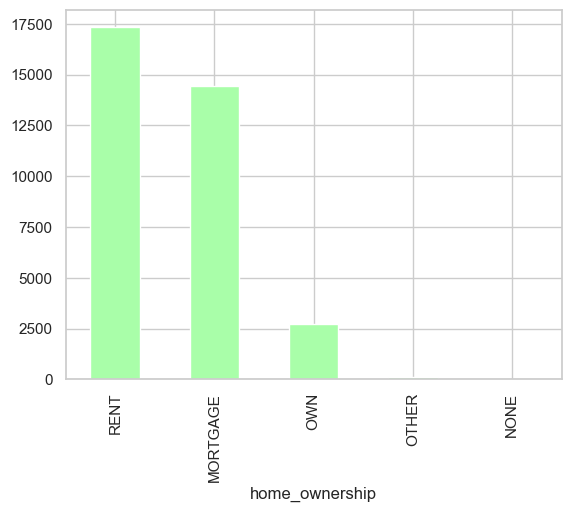

In [202]:
data['home_ownership'].value_counts().plot.bar()


<Axes: xlabel='purpose'>

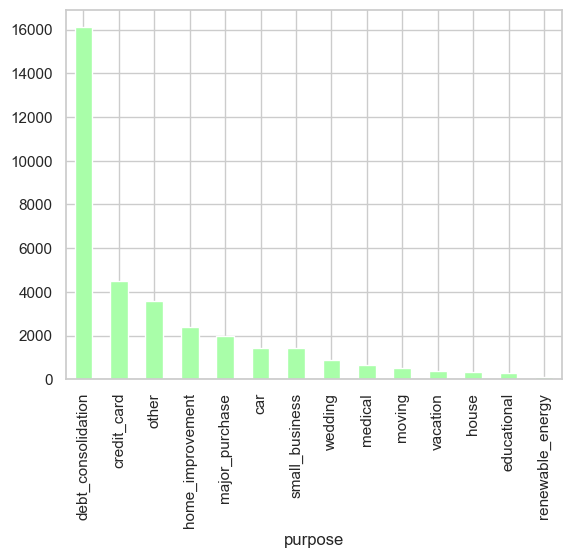

In [203]:
data['purpose'].value_counts().plot.bar()


<Axes: ylabel='count'>

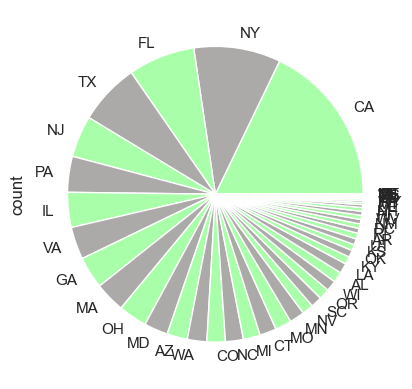

In [204]:
ownership=data
ownership["loan_status"].value_counts()
data['addr_state'].value_counts().plot(kind="pie")



In [205]:
# Ordered Categorical Variable Analysis


<Axes: ylabel='count'>

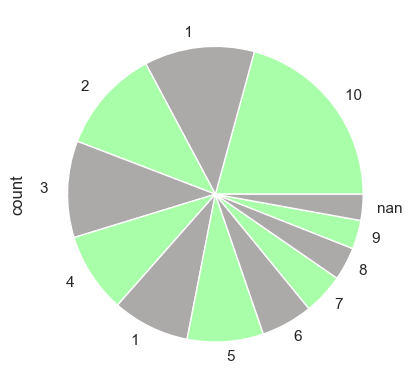

In [206]:
data['emp_length'].value_counts().plot(kind="pie")


In [207]:
#Bivariate Analysis


In [208]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = data.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0)
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
annual_inc_b,,,,
0 - 40k,1743,7934,9677,0.180118
40k - 50k,849,4785,5634,0.150692
50k to 60k,810,4578,5388,0.150334
60k to 70k,512,3354,3866,0.132437
70k to 80k,397,2823,3220,0.123292
80k - above,685,6095,6780,0.101032


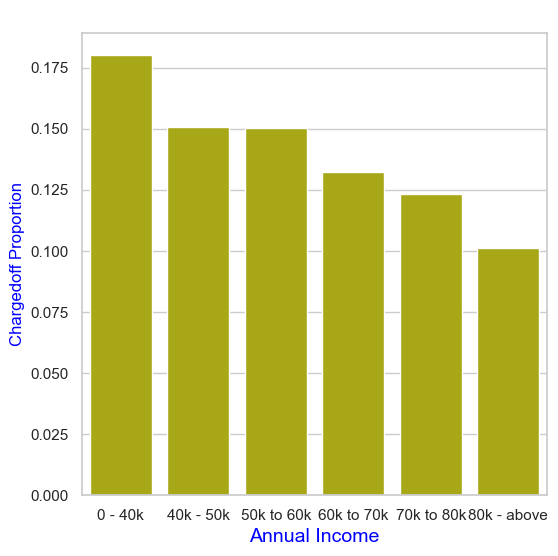

In [209]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(6, 6))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan,color="y")
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'b')
ax1.set_xlabel('Annual Income',fontsize=14,color='b')
plt.show()
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [210]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = data.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1705,4803,6508,0.261985
0,High,1034,4955,5989,0.172650
2,Medium,1036,5835,6871,0.150779
1,Low,653,5298,5951,0.109729
4,Very Low,568,8678,9246,0.061432


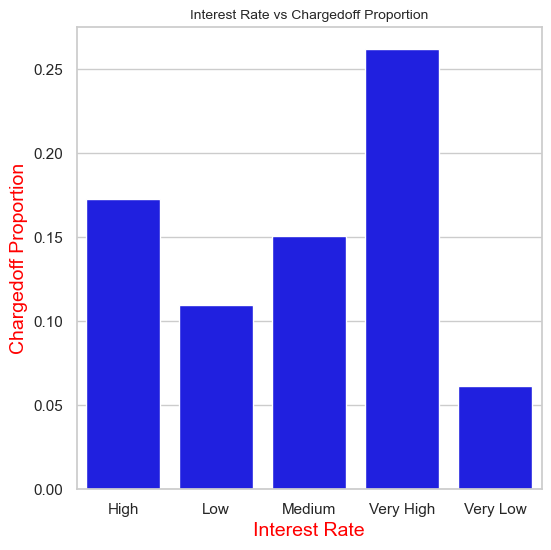

In [211]:
## plot the diagram.
fig, ax1 = plt.subplots(figsize=(6, 6))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=10)
ax1=sns.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan,color='b')
ax1.set_xlabel('Interest Rate',fontsize=14,color='r')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'r')
plt.show()

# Observations:
# interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [212]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = data.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,OTHER,16.0,73.0,89.0,0.179775
4,RENT,2632.0,14700.0,17332.0,0.151858
3,OWN,404.0,2315.0,2719.0,0.148584
0,MORTGAGE,1944.0,12478.0,14422.0,0.134794
1,NONE,0.0,3.0,3.0,0.000000


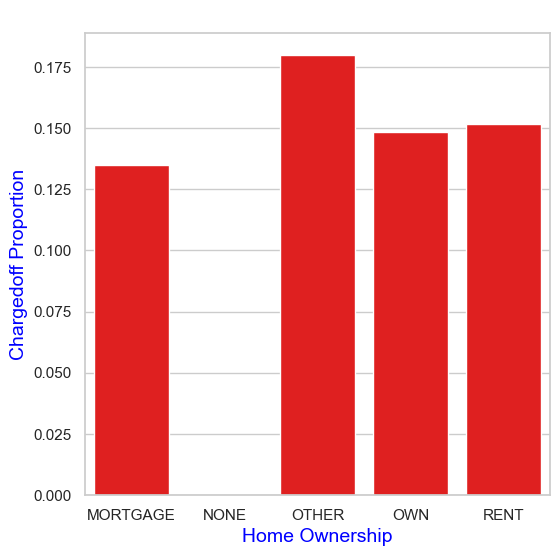

In [213]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan,color='r')
ax1.set_xlabel('Home Ownership',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

In [214]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,386,1046,1432,0.269553
10,renewable_energy,17,73,90,0.188889
3,educational,52,254,306,0.169935
8,moving,90,446,536,0.167910
9,other,579,3016,3595,0.161057
7,medical,101,532,633,0.159558
5,house,49,261,310,0.158065
2,debt_consolidation,2442,13667,16109,0.151592
12,vacation,52,310,362,0.143646
4,home_improvement,295,2099,2394,0.123225


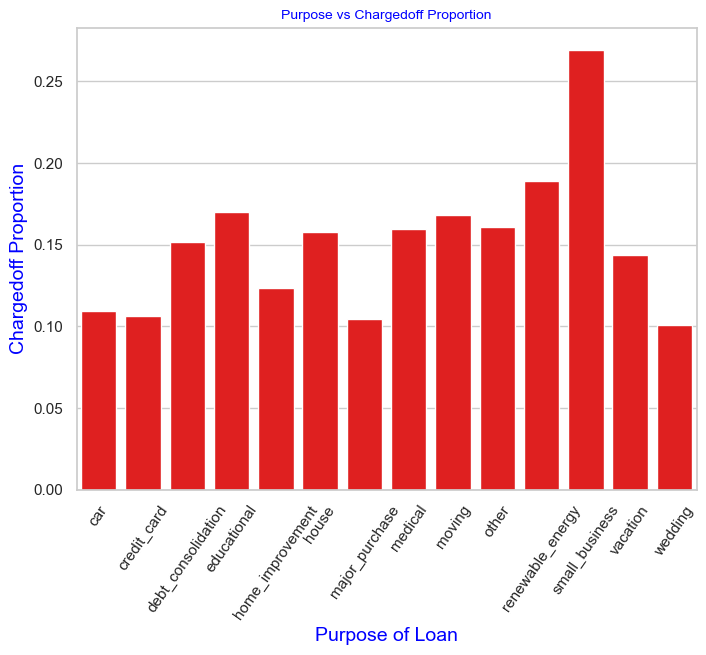

In [215]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=10,color='b')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan,color= 'r')
ax1.set_xlabel('Purpose of Loan',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.xticks(rotation=55)

plt.show()

In [216]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -
issue_year_vs_loan = data.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2007,35,181,216,0.162037
4,2011,2827,15190,18017,0.156907
1,2008,220,1225,1445,0.152249
3,2010,1378,9191,10569,0.130381
2,2009,536,3782,4318,0.124132


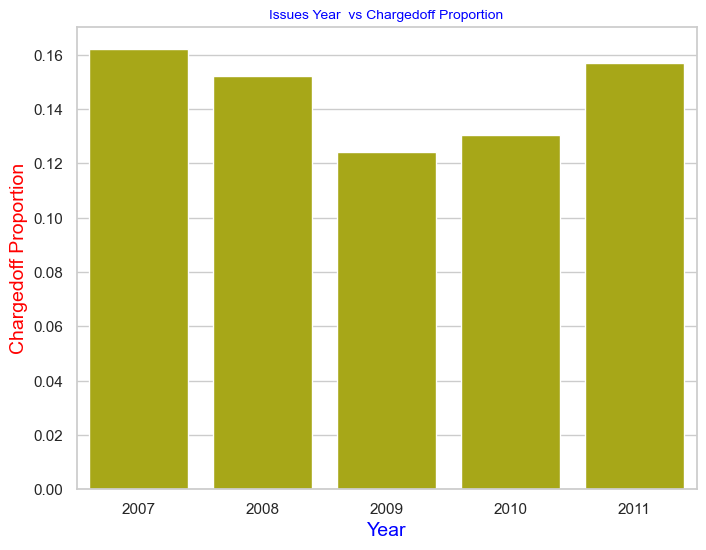

In [217]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=10,color='b')
ax1=sns.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan,color='y')
ax1.set_xlabel('Year',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'r')
plt.show()

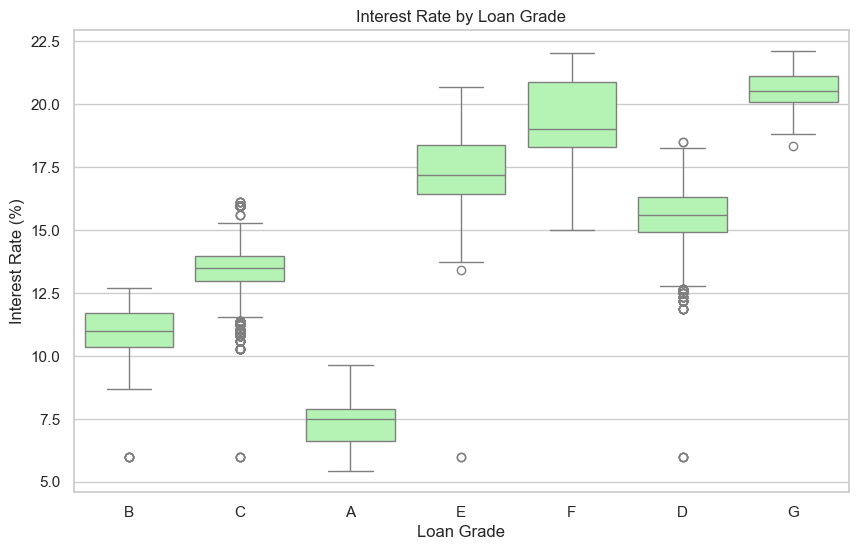

In [305]:
import seaborn as sns
import warnings 
warnings.filterwarnings(action="ignore")

#loan_data = pd.read_csv(r"C:\Users\PATITAPABAN\Desktop\Control\IIIT-Bangalore- MS\Classes\Assignment 1\LendingClubCaseStudy1\loan.csv")
# Convert interest rate to numeric by removing '%' and converting to float
##data['int_rate'] = data['int_rate'].str.rstrip('%').astype('float')

# Clean the grade and sub_grade columns
##data['grade'] = data['grade'].astype('category')
##data['sub_grade'] = data['sub_grade'].astype('category')

# Define a risk factor based on grade and interest rate for analysis
# Higher grades (A, B) are typically less risky, lower grades (D, E) are higher risk
# Higher interest rates generally indicate higher risk loans

# Create a risk heatmap based on grade and interest rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=data)
plt.title('Interest Rate by Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.xlabel('Loan Grade')
plt.show()


In [303]:
chargeoff_within_12_mths

<class 'pandas.core.frame.DataFrame'>
Index: 34565 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   34565 non-null  float64       
 1   funded_amnt                 34565 non-null  float64       
 2   funded_amnt_inv             34565 non-null  float64       
 3   term                        34565 non-null  int64         
 4   int_rate                    34565 non-null  float64       
 5   installment                 34565 non-null  float64       
 6   grade                       34565 non-null  object        
 7   sub_grade                   34565 non-null  object        
 8   emp_title                   32486 non-null  object        
 9   emp_length                  34565 non-null  object        
 10  home_ownership              34565 non-null  object        
 11  annual_inc                  34565 non-null  float64       
